### Import relevant modules

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
%matplotlib inline

### Read data

In [2]:
df = pd.read_csv('data/Automobile price data _Raw_.csv')
df.replace('?',0, inplace=True)                                     # Replace '?' with '0' in dataset
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,0,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


### Prepare train & test data sets

In [3]:
X = df.iloc[:,:-1]
X.drop(['engine-location'],axis=1,inplace=True)
X = pd.get_dummies(X, columns=['make','fuel-type','aspiration','num-of-doors','body-style','drive-wheels',\
                            'engine-type','num-of-cylinders','fuel-system'], drop_first=True)
y = df.iloc[:,-1:]

(X_train, X_test, y_train, y_test) = train_test_split(X, y, test_size=0.3)
X_train = X_train.apply(pd.to_numeric)
X_test = X_test.apply(pd.to_numeric)
y_train = y_train.apply(pd.to_numeric)
y_test = y_test.apply(pd.to_numeric)
type(X), X.shape, y.shape, X_train.shape,  y_train.shape, X_test.shape, y_test.shape

(pandas.core.frame.DataFrame,
 (205, 65),
 (205, 1),
 (143, 65),
 (143, 1),
 (62, 65),
 (62, 1))

### Train & test  model  - Linear Regression

In [4]:
from sklearn.linear_model import LinearRegression
linreg = LinearRegression()
linreg.fit(X_train, y_train)
print ('Score (train) = {}%'.format(np.around(linreg.score(X_train, y_train),decimals=4)*100))
print ('Score (test) = {}%'.format(np.around(linreg.score(X_test, y_test),decimals=4)*100))
val = X_test.iloc[:1,:]
p1 = linreg.predict(val)
p_linreg = linreg.predict(X_test)

Score (train) = 96.07%
Score (test) = 64.78%


### Train & test model - Random Forrest Regressor

In [5]:
from sklearn.ensemble import RandomForestRegressor
forrestreg = RandomForestRegressor(max_depth=2, random_state=0, n_estimators=100)
forrestreg.fit(X_train, y_train)
print ('Score (train) = {}%'.format(np.around(forrestreg.score(X_train, y_train),decimals=4)*100))
print ('Score (test) = {}%'.format(np.around(forrestreg.score(X_test, y_test),decimals=4)*100))
p_forrestreg = forrestreg.predict(X_test)

C:\Users\erb\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d
C:\Users\erb\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


Score (train) = 86.19%
Score (test) = 80.97%


### Train & test model - Gredient Boost Regressor

In [6]:
from sklearn import ensemble
params = {'n_estimators': 500, 'max_depth': 4, 'min_samples_split': 2, 'learning_rate': 0.01, 'loss': 'ls'}
gradboostreg = ensemble.GradientBoostingRegressor(**params)
gradboostreg.fit(X_train, y_train)
print ('Score (train) = {}%'.format(np.around(gradboostreg.score(X_train, y_train),decimals=4)*100))
print ('Score (test) = {}%'.format(np.around(gradboostreg.score(X_test, y_test),decimals=4)*100))
p_gradboostreg = gradboostreg.predict(X_test)

C:\Users\erb\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Score (train) = 99.6%
Score (test) = 87.56%


### Train & test model - XGBoost

In [7]:
import xgboost
# xgb = xgboost.XGBRegressor()
xgbreg = xgboost.XGBRegressor(n_estimators=100, learning_rate=0.08, gamma=0, subsample=0.75, colsample_bytree=1, max_depth=3)
xgbreg.fit(X_train, y_train)
print ('Score (train) = {}%'.format(np.around(xgbreg.score(X_train, y_train),decimals=4)*100))
print ('Score (test) = {}%'.format(np.around(xgbreg.score(X_test, y_test),decimals=4)*100))
p_xgbreg = xgbreg.predict(X_test)

Score (train) = 98.4%
Score (test) = 82.15%


### Overall comparison of Regression Algos

In [8]:
print ('Linear Regression Score (train) = {}%'.format(np.around(linreg.score(X_train, y_train),decimals=4)*100))
print ('Linear Regression Score (test) = {}%'.format(np.around(linreg.score(X_test, y_test),decimals=4)*100))
print ('\n')
print ('Random Forrest Score (train) = {}%'.format(np.around(forrestreg.score(X_train, y_train),decimals=4)*100))
print ('Random Forrest Score (test) = {}%'.format(np.around(forrestreg.score(X_test, y_test),decimals=4)*100))
print ('\n')
print ('Gradient Boost Score (train) = {}%'.format(np.around(gradboostreg.score(X_train, y_train),decimals=4)*100))
print ('Gradient Boost Score (test) = {}%'.format(np.around(gradboostreg.score(X_test, y_test),decimals=4)*100))
print ('\n')
print ('XGBoost Score (train) = {}%'.format(np.around(xgbreg.score(X_train, y_train),decimals=4)*100))
print ('XGBoost Score (test) = {}%'.format(np.around(xgbreg.score(X_test, y_test),decimals=4)*100))

Linear Regression Score (train) = 96.07%
Linear Regression Score (test) = 64.78%


Random Forrest Score (train) = 86.19%
Random Forrest Score (test) = 80.97%


Gradient Boost Score (train) = 99.6%
Gradient Boost Score (test) = 87.56%


XGBoost Score (train) = 98.4%
XGBoost Score (test) = 82.15%


### Vizualize data

array([<matplotlib.axes._subplots.AxesSubplot object at 0x000000000B2267F0>,
      dtype=object)

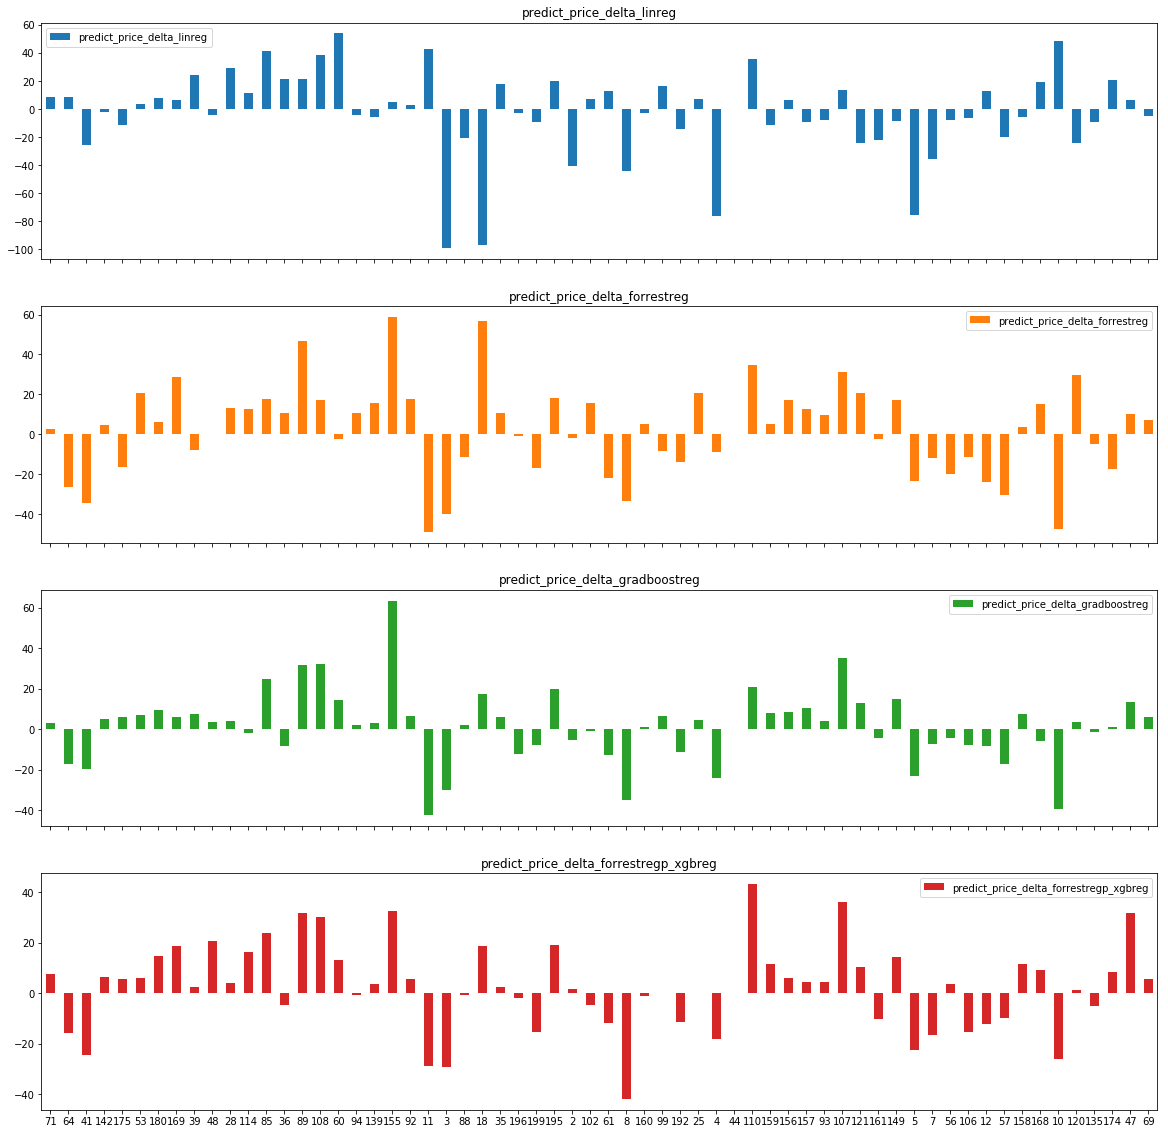

In [9]:
# p_linreg  p_forrestreg   p_gradboostreg   p_xgbreg
price_predict = y_test

price_predict['prediction_linreg'] = p_linreg
price_predict['predict_price_delta_linreg'] = ((price_predict['prediction_linreg'] - price_predict['price'])/price_predict['price'])*100
# price_predict['predict_price_delta_linreg'].plot.bar(figsize=(20,5))
price_predict['prediction_forrestreg'] = p_forrestreg
price_predict['predict_price_delta_forrestreg'] = ((price_predict['prediction_forrestreg'] - price_predict['price'])/price_predict['price'])*100
# price_predict['predict_price_delta_forrestreg'].plot.bar(figsize=(20,5))
price_predict['prediction_gradboostreg'] = p_gradboostreg
price_predict['predict_price_delta_gradboostreg'] = ((price_predict['prediction_gradboostreg'] - price_predict['price'])/price_predict['price'])*100
# price_predict['predict_price_delta_gradboostreg'].plot.bar(figsize=(20,5))
price_predict['prediction_forrestregp_xgbreg'] = p_xgbreg
price_predict['predict_price_delta_forrestregp_xgbreg'] = ((price_predict['prediction_forrestregp_xgbreg'] - price_predict['price'])/price_predict['price'])*100
# price_predict['predict_price_delta_forrestregp_xgbreg'].plot.bar(figsize=(20,5))
price_predict_delta = price_predict[['predict_price_delta_linreg','predict_price_delta_forrestreg','predict_price_delta_gradboostreg',\
               'predict_price_delta_forrestregp_xgbreg']]
price_predict_delta.plot.bar(rot=0, figsize=(20,20), subplots=True)